## Data Cleaning and Transformation with Python

* Introduction

* Data & Messy Data

* What is Data Cleaning?

* What is Data Transformation?

* Data Exploration

* 101 guide to data cleaning

* 101 guide to data transformation


## Introduction

Data is messy in the real world, and it is very important to know the best practices in handling them. The event is focused on teaching participants on the techniques of how to handle missing values by implementing and discussing the pros and cons of each approach (Data Cleaning). It is also focused on teaching participants on how to handle numerical and categorical data encoding (Data Transformation) for good analysis and data science practise. At the end of the event, the participants will be introduced to various data cleaning and transformation techniques to implement and experiment in their next data science project.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### What is data & Messy data

#### What is a data?

Data is anything we gather in raw fact. Data can be in form of numbers, strings, date, images, text, audio, etc. It can also be in structured and unstructured form.

#### What is a Messy data?

A messy data is a data that suffers from cleaniness, in which it contains incosistency and errors.

#### Data

In [ ]:
### Data (In a school setting during)
school_data = {'Name':['student_A', 'student_B', 'student_c'],
 'MIDSemester_Score':[20, 10, 30],
 'Exam_Score': [40, 30, 50],
 'Total':[60, 40, 80]}

In [ ]:
pd.DataFrame(school_data)

,Name,MIDSemester_Score,Exam_Score,Total
0,student_A,20,40,60
1,student_B,10,30,40
2,student_c,30,50,80


#### Messy data

In [ ]:
### supermarket setting

super_market = {'Goods':['A', 'B', 'C'],
 'Price':[10, None, 60]}

In [ ]:
pd.DataFrame(super_market)

,Goods,Price
0,A,10.0
1,B,NaN
2,C,60.0


### Data Exploration

* Data Understanding

* Data Types

* Duplicate values

* Missing values

#### Data Understanding

It is very important that we look at our dataset, before cleaning.

Dataset link - https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


Heart Failure Prediction
Problem Statement
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information

Age: Age of the patient in years

Sex: Sex of the patient [M: Male, F:Female]

ChestPainType (cp) : [TA: Typical Anigna, ATA: Atypical Anigna, NAP: Non Anigal Pain, ASY: Asymptomatic]

RestingBP: Resting blood pressure in mmHg

Cholesterol: Serum Cholesterol in mm/dl

FastingBS: Fasting blood sugar [1:if FastingBS > 120, 0:Otherwise]

RestingECG: Resting Electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' citeria]

MaxHR: Maximum heart rate acheieved [between 60 and 202]

ExerciseAnigna: Exercise-induced anigna[Y:Yes, N:No]

Oldpeak: Numeric value measured in depression

ST_Slope: The slope of the peak xercise ST segment [Up:Upsloping, Flat:Flat, Down: Downsloping]

HeartDisease: [1:Heart disease, 0:Normal]

In [ ]:
dataset = "https://raw.githubusercontent.com/Adebesin-Aramide/MLSA_Workshop_Data-Preprocessing/main/heart_disease_uci%202.csv"
df = pd.read_csv(dataset)

In [ ]:
## check the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
print(f'The shape of the data set {df.shape}')
print(f'The total rows of the data set {df.shape[0]}')
print(f'The total columns of the data set {df.shape[1]}')

The shape of the data set (920, 16)
The total rows of the data set 920
The total columns of the data set 16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Data Types

In [ ]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

#### Duplicate values

In [ ]:
df[df.duplicated()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


#### Missing Values

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

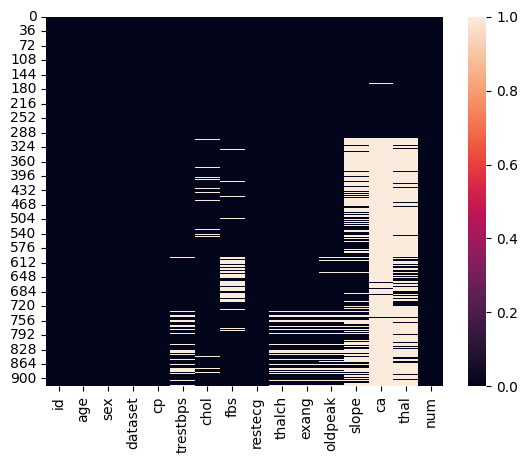

In [ ]:
#visualizing the missing values
sns.heatmap(df.isnull());

In [ ]:
## know the missing values percentage
(df.isnull().sum()/len(df))*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

#### 101 guide to data cleaning

* Features checking

* Drop insignificant features

* Drop missing values

* Filling the missing values


#### Features checking

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

#### Drop insignificant features

* Dropping the id column is the basic (except, it has another meaning beyond serial number identification)

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df = df.drop('id', axis=1)

#### Drop missing values

* The standard in most project is to drop any missing values greater than 30% of the total data, except:

* The feature is very important.

* The missing values data, can be traced and collected. (e.g a missing location but we observe that we have the longitude and latitude data without missing)

* Relying on Gradient boosting models (Lightgbm, Xgboost, and Catboost)



In [ ]:
(df.isnull().sum()/len(df)*100).reset_index().sort_values(by=0, ascending=False)

,index,0
12,ca,66.413043
13,thal,52.826087
11,slope,33.586957
6,fbs,9.782609
10,oldpeak,6.739130
4,trestbps,6.413043
8,thalch,5.978261
9,exang,5.978261
5,chol,3.260870
7,restecg,0.217391


In [ ]:
to_drop = ['ca', 'thal','slope']

**Method**

* drop (axis=1)

In [ ]:
df = df.drop(to_drop, axis=1)

#### Filling missing values

In [ ]:
miss_col = ['fbs', 'oldpeak', 'trestbps', 'thalch', 'exang', 'chol', 'restecg']

In [ ]:
df[miss_col]

,fbs,oldpeak,trestbps,thalch,exang,chol,restecg
0,True,2.3,145.0,150.0,False,233.0,lv hypertrophy
1,False,1.5,160.0,108.0,True,286.0,lv hypertrophy
2,False,2.6,120.0,129.0,True,229.0,lv hypertrophy
3,False,3.5,130.0,187.0,False,250.0,normal
4,False,1.4,130.0,172.0,False,204.0,lv hypertrophy
...,...,...,...,...,...,...,...
915,True,0.0,127.0,154.0,False,333.0,st-t abnormality
916,False,NaN,NaN,NaN,NaN,139.0,st-t abnormality
917,True,0.0,122.0,100.0,False,223.0,st-t abnormality
918,True,NaN,NaN,NaN,NaN,385.0,lv hypertrophy


* 2 boolean features are missing.

* 4 numerical features are missing.

* 1 categorical feature is missing.

In [ ]:
df_copy = df.copy() ## make copy of the dataset before filling the missing values

#### using Threshold

* we observe that, we have less than 0.22% (2 rows) of **restecg** features missing.

* Method - dropna (subset)

In [ ]:
## using subset by removing all rows with missing restecg
## Always reset index to balance the rows in order
df = df.dropna(subset=['restecg']).reset_index(drop=True)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
914,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,0
915,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2
916,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


In [ ]:
### check the data set rows before and after subset
print(f'The rows before {df_copy.shape[0]}')
print(f'The rows before {df.shape[0]}')

The rows before 920
The rows before 918


#### Numerical data missing values

**Using Statistical method**

* Old peak

* trestbps

* thalch

* chol

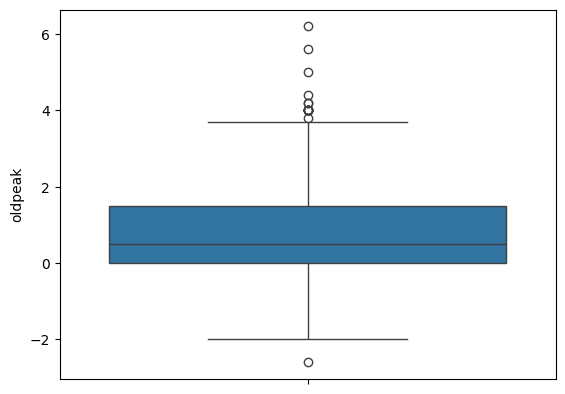

In [ ]:
## look at old peak distribution
sns.boxplot(df['oldpeak']);

The old peak distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [ ]:
## Looking at the gender distribution of missing values
df[df['oldpeak'].isna()]['sex'].value_counts()

Male      61
Female     1
Name: sex, dtype: int64

In [ ]:
df['oldpeak'].describe()

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [ ]:
df.groupby('sex')['oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,194.0,0.667526,0.954795,0.0,0.0,0.0,1.075,6.2
Male,724.0,0.905110,1.079836,-2.6,0.0,0.5,1.525,5.6


It is ideal to fill the missing values with each sex median values

In [ ]:
df['oldpeak'] = df['oldpeak'].fillna(value=df['oldpeak'].median())

In [ ]:
## Testing the result
assert df['oldpeak'].isnull().sum() == 0

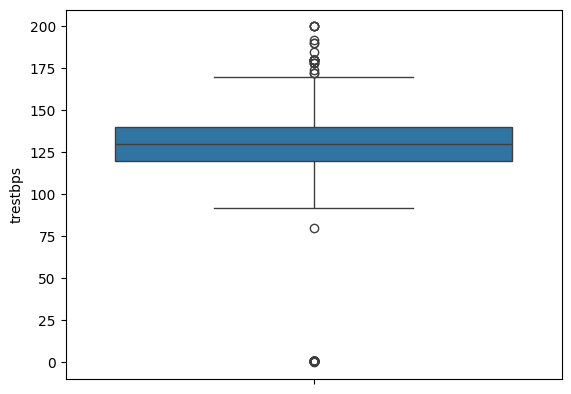

In [ ]:
### looking at trestbps distribution
sns.boxplot(df['trestbps']);

The trestbps distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [ ]:
## Looking at the gender distribution of missing values
df[df['trestbps'].isna()]['sex'].value_counts()

Series([], Name: sex, dtype: int64)

In [ ]:
df['trestbps'].describe()

count    918.000000
mean     123.682462
std       37.200556
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
df.groupby('sex')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,194.0,130.737113,23.542828,0.5,120.0,130.0,140.0,200.0
Male,724.0,121.792127,39.878862,0.0,119.5,130.0,140.0,200.0


They both have the same median values, then, we can fill it with median values

**Method**

fillna

In [ ]:
df['trestbps'] = df['trestbps'].fillna(value=df['trestbps'].median())

In [ ]:
## Testing the result
assert df['trestbps'].isnull().sum() == 0

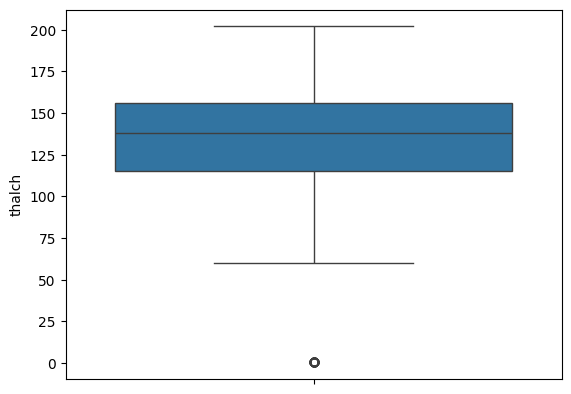

In [ ]:
sns.boxplot(df['thalch']);

The thalch distribution contains just few outliers, hence, mean imputation is ideal in filling the missing values.

In [ ]:
## Looking at the gender distribution of missing values
df[df['thalch'].isna()]['sex'].value_counts()

Series([], Name: sex, dtype: int64)

**Method**

fillna (mean)

In [ ]:
df['thalch'] = df['thalch'].fillna(value=df['thalch'].mean())

In [ ]:
## Testing the result
assert df['thalch'].isnull().sum() == 0

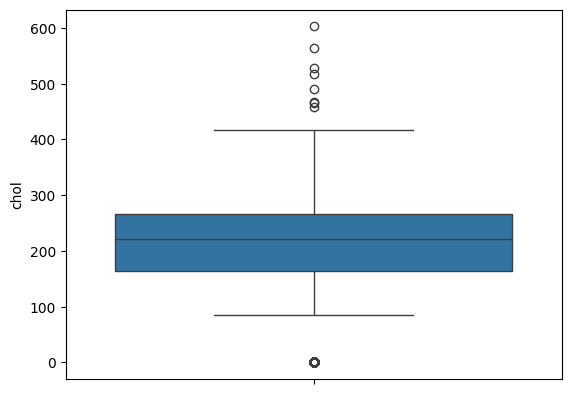

In [ ]:
sns.boxplot(df['chol']);

The chol distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [ ]:
df['chol'] = df['chol'].fillna(value=df['chol'].median())

In [ ]:
assert df["chol"].isnull().sum() == 0

#### Categorical data missing values

* Mode

* Fill them with 'unknown'

In [ ]:
df['fbs'].isnull().sum()

0

In [ ]:
df['exang'].isnull().sum()

0

In [ ]:
## mode for exang
df['exang'] = df['exang'].fillna(value=df['exang'].mode()[0])

In [ ]:
## unknown for fbs
df['fbs'] = df['fbs'].fillna('unknown')

**Note**

we observe difference when we are using (mean() and median()) and mode()[0] when we fill the missing values

In [ ]:
print(df['exang'].mode())
print('------------------------')
print(df['exang'].mode()[0])

0    False
Name: exang, dtype: object
------------------------
False


In [ ]:
print(df['chol'].mean())
print(df['chol'].median())

192.7516339869281
221.0


In [ ]:
## check if our data set is free from missing values
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

### 101 guide to Data Transformation

Data Transformation is a technique that is used for

1. Encoding

2. Binning

3. Feature Engineering

4. Standardization and Normalization

5. Tf-idf


In [ ]:
df.select_dtypes("object")

,sex,dataset,cp,fbs,restecg,exang
0,Male,Cleveland,typical angina,True,lv hypertrophy,False
1,Male,Cleveland,asymptomatic,False,lv hypertrophy,True
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True
3,Male,Cleveland,non-anginal,False,normal,False
4,Female,Cleveland,atypical angina,False,lv hypertrophy,False
...,...,...,...,...,...,...
913,Female,VA Long Beach,asymptomatic,True,st-t abnormality,False
914,Male,VA Long Beach,typical angina,False,st-t abnormality,0.5
915,Male,VA Long Beach,asymptomatic,True,st-t abnormality,False
916,Male,VA Long Beach,asymptomatic,True,lv hypertrophy,0.5


In [ ]:
for cat_col in df.select_dtypes('object').columns:
    print('------------------------')
    print(df[cat_col].value_counts())


------------------------
Male      724
Female    194
Name: sex, dtype: int64
------------------------
Cleveland        304
Hungary          292
VA Long Beach    200
Switzerland      122
Name: dataset, dtype: int64
------------------------
asymptomatic       495
non-anginal        204
atypical angina    174
typical angina      45
Name: cp, dtype: int64
------------------------
False    691
True     138
0.5       89
Name: fbs, dtype: int64
------------------------
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64
------------------------
False    526
True     337
0.5       55
Name: exang, dtype: int64


#### Encoding

This is a way transform our categorical data into numbers.

* One Hot encoding

* Ordinal encoding

* Label Encoding

* Count (Frequency) encoding

* Target Encoding

* Gradient boosting encoding

**One Hot Encoding**

It is the simplest form of encoding techniques, which means transforming a categorical feature into dummy numbers of features. It is used for features with no meaningful ranking

* Pros:

1. Easy to implement.

2. useful for nominal data point.


* Cons:

* Cause sparsity for high cardinality feature (it generates features by number of unique counts).


In [ ]:
## sex for one hot encoding
df = pd.get_dummies(df, columns=['sex'])

In [ ]:
df

,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Female,sex_Male
0,63,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0,1
1,67,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,0,1
2,67,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,0,1
3,37,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0,1
4,41,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,1,0
914,62,VA Long Beach,typical angina,0.5,139.0,False,st-t abnormality,0.5,0.5,0.5,0,0,1
915,55,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,0,1
916,58,VA Long Beach,asymptomatic,0.5,385.0,True,lv hypertrophy,0.5,0.5,0.5,0,0,1


**Label Encoding**

This encoding technique is used to transfrom feature based on the labels value in ascending order. It encodes based on alphabetical order.

* Pros:

* Easy to implement.

* Useful for both low and High cardinal features.

* Works well with Gradient boosting models.

* Cons:

* can be misleading during interpretation

In [ ]:
df['dataset'].value_counts()

Cleveland        304
Hungary          292
VA Long Beach    200
Switzerland      122
Name: dataset, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
df['dataset'] = label.fit_transform(df['dataset'])

In [ ]:
df['dataset'].value_counts()

0    304
1    292
3    200
2    122
Name: dataset, dtype: int64

## Binning

This is the method of converting numerical data into categories

In [ ]:
def age_group(x):
    if x < 35:
        return 'Young_Adult'
    elif x > 35 and x < 65:
        return 'Adult'
    else:
        return 'Old_Age'

In [ ]:
df['age'].apply(age_group).value_counts()

Adult          784
Old_Age        114
Young_Adult     20
Name: age, dtype: int64

### Feature Engineering

This is a form of creating new feature from existing features.

In [ ]:
## we create age group from age
df['age_group'] = df['age'].apply(age_group)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
s

ValueError: could not convert string to float: 'typical angina'

### Experiment is very key, in building a successful predictive model.

## THANK YOU